In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

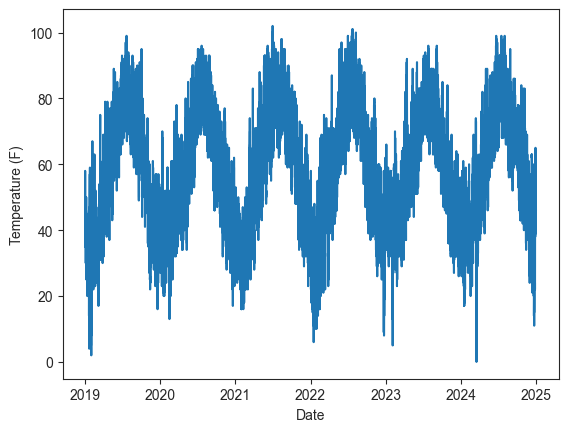

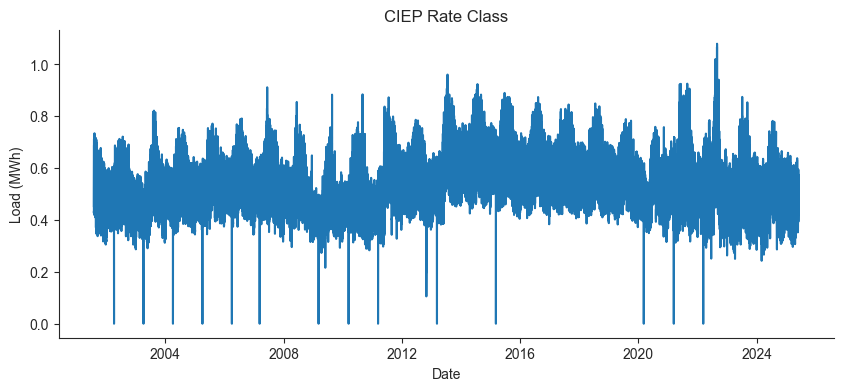

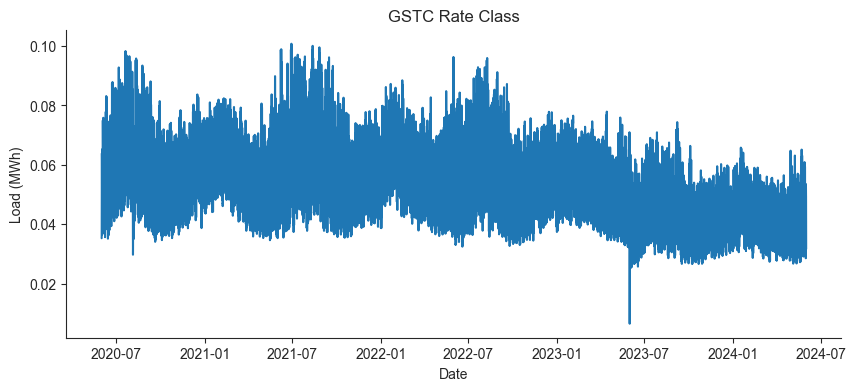

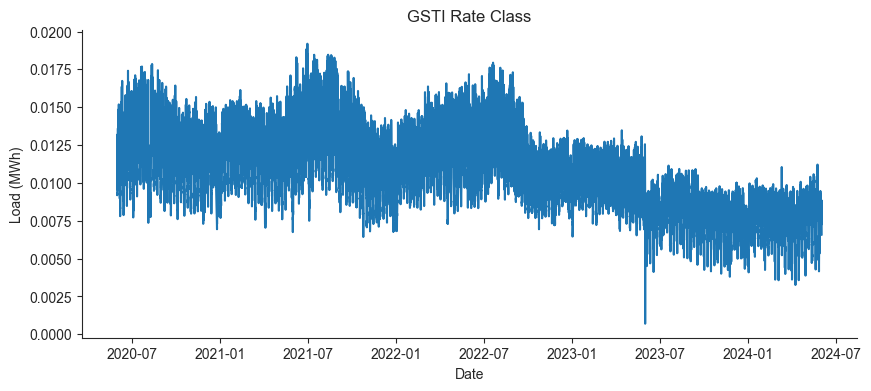

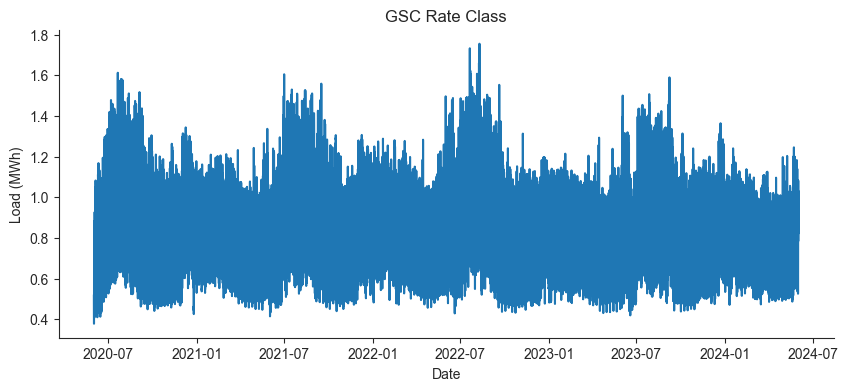

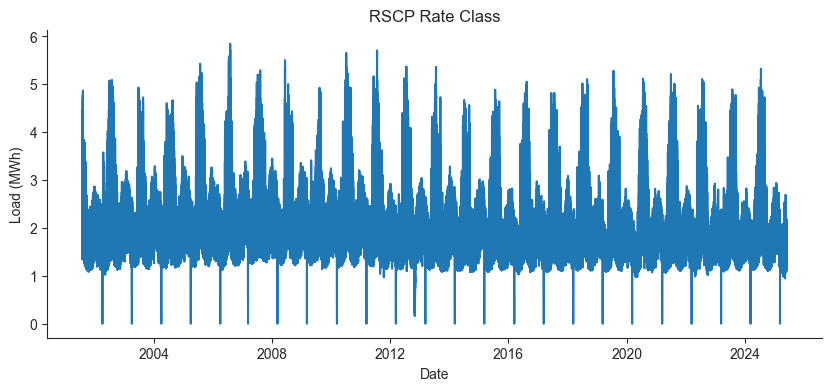

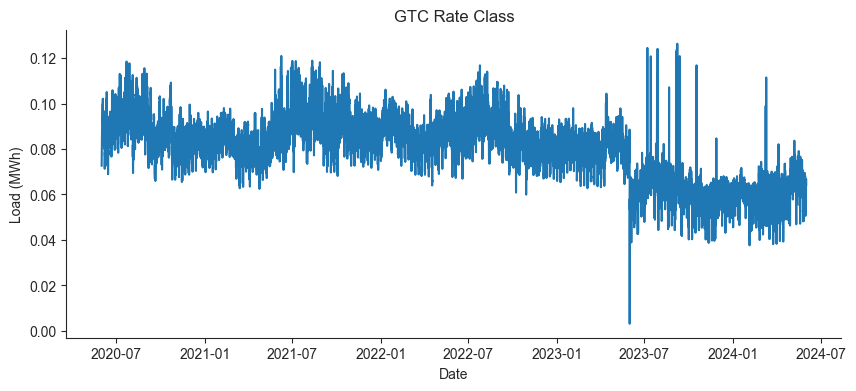

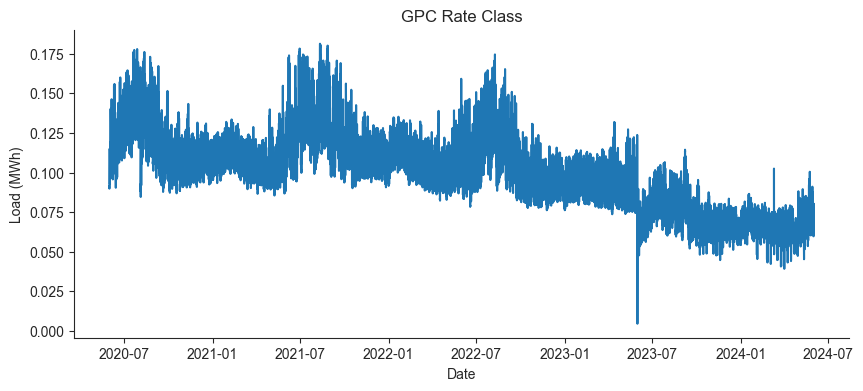

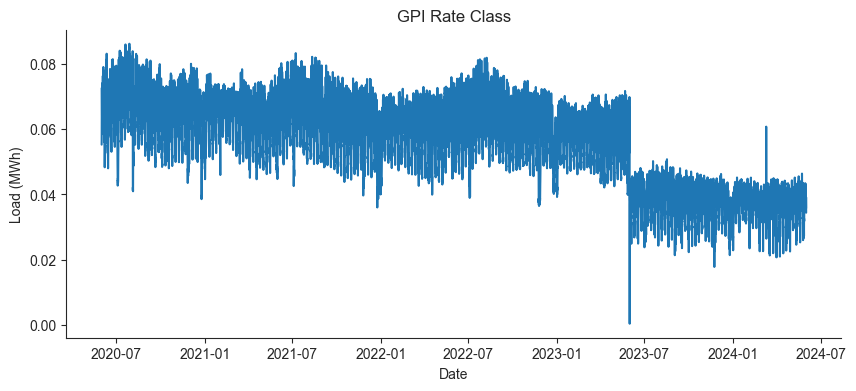

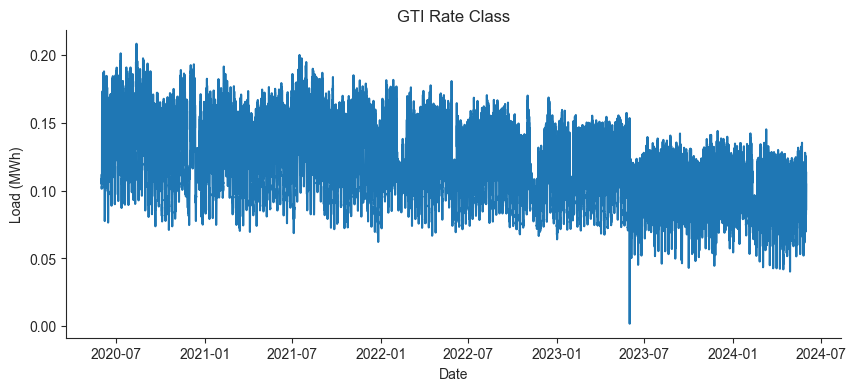

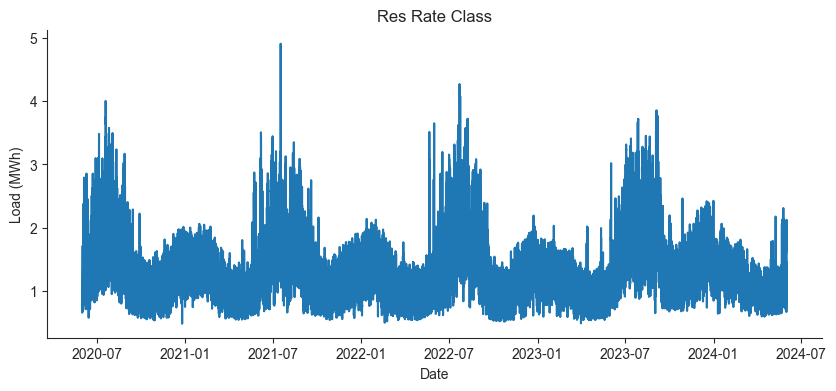

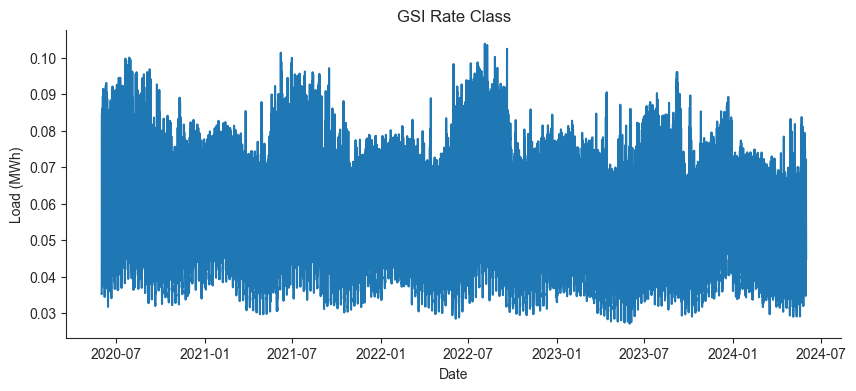

In [16]:
import os

sns.set_style("ticks")

path = "Data/Y/"

files = os.listdir(path)

weather_df = pd.read_csv("Data/hourly_weather_newark.csv")
weather_df["Date"] = pd.to_datetime(weather_df["Date"])

sns.lineplot(
        data = weather_df,
        x="Date", y="Temperature (F)",
)

for file in files:
    df = pd.read_excel(path + file)
    name = file.removesuffix("_cleaned.xlsx")

    df.rename(columns={name: "Load"}, inplace=True)
    df["Load"] = df["Load"] / 1000 # make sure all load units are in megawatts, MW = KW/1000
    df["Date"] = pd.to_datetime(df["Date"])

    fig, ax = plt.subplots(figsize=(10, 4)) # width and height in inches
    ax.set_title(f'{name} Rate Class')
    ax.set(xlabel='Date', ylabel='Load (MWh)')

    sns.lineplot(
         data = df,
         x="Date", y="Load",
         ax=ax
    )
    sns.despine()